In [616]:
import pandas as pd
import numpy as np
# Set Pandas display options
# Display all rows
# Display all columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

####  Data is of closed job cards from the period April till date

In [617]:
#Job card Data
df1 = pd.read_csv('C:/Users/Admin/Downloads/Job_card_data/job_card.csv')
df1.head(2)

,JC No.,Create Date,Vehicle No.,Odometer,Job Work Type,Branch,Created By,Approved By,Approved Date,JC Close No.,Closed By,Closed Date,Status,Age,Driver Name,Driver No.,Maintenance Description,Remark
0,RWR2324JC/1494,30-11-23 18:00,NL01Q5968,344272,SHIV OM VEHICLE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 18:22,RWR2324CJC/1467,Virendra Singh,04-12-23 10:26,Closed,NaN,Bulet Kumar S/o Bhola Singh (d2298),7054061022,NaN,"PRESSURE LEAKAGE CHECK, ,DRIVER TOOL REQ., ,AI..."
1,RWR2324JC/1493,30-11-23 17:42,NL01AC1024,311535,OUT SIDE JOB DONE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 17:42,RWR2324CJC/1424,Virendra Singh,30-11-23 18:18,Closed,NaN,Dheer Singh Sikarwar S/o B S Sikarwar (2226),9669703532,TYRE REQUIRED,JOB WORK ( 100*1 ) TYRE DT 22.11.2023 AT SHIV ...


#### Data Audit

In [618]:
# Replace spaces with underscores and convert column names to lowercase
df1.columns = df1.columns.str.replace(' ', '_').str.lower()
df1.columns = df1.columns.str.replace('.', '').str.lower()

In [619]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   jc_no                    2348 non-null   object 
 1   create_date              2348 non-null   object 
 2   vehicle_no               2347 non-null   object 
 3   odometer                 2348 non-null   int64  
 4   job_work_type            2348 non-null   object 
 5   branch                   2348 non-null   object 
 6   created_by               2348 non-null   object 
 7   approved_by              2348 non-null   object 
 8   approved_date            2348 non-null   object 
 9   jc_close_no              2348 non-null   object 
 10  closed_by                2348 non-null   object 
 11  closed_date              2348 non-null   object 
 12  status                   2348 non-null   object 
 13  age                      0 non-null      float64
 14  driver_name             

In [620]:
df1.isna().sum()

jc_no                         0
create_date                   0
vehicle_no                    1
odometer                      0
job_work_type                 0
branch                        0
created_by                    0
approved_by                   0
approved_date                 0
jc_close_no                   0
closed_by                     0
closed_date                   0
status                        0
age                        2348
driver_name                  44
driver_no                    60
maintenance_description    1747
remark                       26
dtype: int64

In [621]:
df1.columns

Index(['jc_no', 'create_date', 'vehicle_no', 'odometer', 'job_work_type',
       'branch', 'created_by', 'approved_by', 'approved_date', 'jc_close_no',
       'closed_by', 'closed_date', 'status', 'age', 'driver_name', 'driver_no',
       'maintenance_description', 'remark'],
      dtype='object')

In [622]:
#### In one job card vehicle no is missing

In [623]:
df1[df1.vehicle_no.isna()]

,jc_no,create_date,vehicle_no,odometer,job_work_type,branch,created_by,approved_by,approved_date,jc_close_no,closed_by,closed_date,status,age,driver_name,driver_no,maintenance_description,remark
2131,NS2324JC/8,18-04-23 15:15,NaN,0,IN-ROUTE,Nasik,Ashif,Virendra Singh,19-04-23 17:10,NS2324CJC/77,Virendra Singh,30-10-23 11:35,Closed,NaN,NaN,NaN,NaN,"hub bearing broken,patta & u clam broken"


#### job card analysis data


In [624]:
df2 = pd.read_csv('C:/Users/Admin/Downloads/Job_card_data/job card analysis.csv')
df2.head(2)

,JC Close No.,Close Date,JC No.,Open Date,Vehicle No.,Service Type,Status,Estimate,Parts,Labour,Total,Variance,Driver Name,Driver No.,Odometer
0,NS2324CJC/1,01-04-23,NS2223JC/88,23-02-23,PB11CF5224,IN-HOUSE,Close,"1,000.00",0,0,0,"1,000.00",Amit Kumar Dixit S/o Balkrishn Dixit (d2079),9812467079,84216
1,NS2324CJC/2,03-04-23,NS2223JC/81,04-02-23,PB11CB7794,IN-HOUSE,Close,"4,000.00","2,109.51",0,"2,109.51","1,890.49",Dara Nishad S/o Sewa Lal Nishad (d0050),7505992135,332214


In [625]:
# Replace spaces with underscores and convert column names to lowercase
df2.columns = df2.columns.str.replace(' ', '_').str.lower()
df2.columns = df2.columns.str.replace('.', '').str.lower()

In [626]:
df2.isna().sum()

jc_close_no       0
close_date        0
jc_no             0
open_date         0
vehicle_no        1
service_type      0
status            0
estimate          0
parts             0
labour            0
total             0
variance          0
driver_name     113
driver_no       266
odometer          0
dtype: int64

#### Merging data

In [627]:
df2 = df2[[ 'jc_no',
       'service_type', 'estimate', 'parts', 'labour', 'total',
       'variance','odometer']]

In [628]:
df3 = df1.merge(df2,on = "jc_no", how = 'left' )
df3.head(2)

,jc_no,create_date,vehicle_no,odometer_x,job_work_type,branch,created_by,approved_by,approved_date,jc_close_no,closed_by,closed_date,status,age,driver_name,driver_no,maintenance_description,remark,service_type,estimate,parts,labour,total,variance,odometer_y
0,RWR2324JC/1494,30-11-23 18:00,NL01Q5968,344272,SHIV OM VEHICLE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 18:22,RWR2324CJC/1467,Virendra Singh,04-12-23 10:26,Closed,NaN,Bulet Kumar S/o Bhola Singh (d2298),7054061022,NaN,"PRESSURE LEAKAGE CHECK, ,DRIVER TOOL REQ., ,AI...",SHIV OM VEHICLE,"82,490.00","64,523.12","6,850.00","71,373.12","11,116.88",344272
1,RWR2324JC/1493,30-11-23 17:42,NL01AC1024,311535,OUT SIDE JOB DONE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 17:42,RWR2324CJC/1424,Virendra Singh,30-11-23 18:18,Closed,NaN,Dheer Singh Sikarwar S/o B S Sikarwar (2226),9669703532,TYRE REQUIRED,JOB WORK ( 100*1 ) TYRE DT 22.11.2023 AT SHIV ...,OUT SIDE JOB DONE,100,0,100,100,0,311535


#### Reading Vehicle Data

In [629]:
df4 = pd.read_csv('C:/Users/Admin/Downloads/Job_card_data/vehicle_master_data.csv')
df4 = df4[df4['Owner Ship'] == 'Owned']
df4.shape

(647, 25)

In [630]:
df4.head(2)

,Vehicle ID,Vehicle Type,Vehicle Use Type,Owner Ship,Registration No,Registration Date,Chassis No,Average With Load,Average Empty,Engine No,Brand,Segment,Model,Body Type,Manufacturing Year,Odometer,Owner,Branch,Fuel Type,Bharat Stage,Total Tyres,Mounted Tyres,Required Tyres,Active,Max Filling Capacity
5,23858,truck,Commercial,Owned,NL01AH1774,3/10/2023,MAT4ZZOOTP2G 19443,3.4,3.8,5LNGOICR34GWXIOS9S1,TATA Motors Ltd,Car Carrier,4021-Tata Signa (4S),TR08,0.0,9012.0,Pallia Trans Logistics Private Limited,Head Office,0,BS VI,11,11,0,Active,380
6,23857,truck,Commercial,Owned,NL01AH1773,3/10/2023,MAT422007P2G19443,3.4,3.8,5LNGDICR34GWX1 04961,TATA Motors Ltd,Car Carrier,4021-Tata Signa (4S),TR08,2023.0,7324.0,Pallia Trans Logistics Private Limited,Head Office,0,BS VI,11,11,0,Active,380


In [631]:
# Replace spaces with underscores and convert column names to lowercase
df4.columns = df4.columns.str.replace(' ', '_').str.lower()
df4.columns = df4.columns.str.replace('.', '').str.lower()

In [632]:
df4.columns


Index(['vehicle_id', 'vehicle_type', 'vehicle_use_type', 'owner_ship',
       'registration_no', 'registration_date', 'chassis_no',
       'average_with_load', 'average_empty', 'engine_no', 'brand', 'segment',
       'model', 'body_type', 'manufacturing_year', 'odometer', 'owner',
       'branch', 'fuel_type', 'bharat_stage', 'total_tyres', 'mounted_tyres',
       'required_tyres', 'active', 'max_filling_capacity'],
      dtype='object')

In [633]:
df4 = df4[['registration_no','brand', 'segment',
       'model', 'body_type', 'manufacturing_year']]

In [634]:
df = df3.merge(df4, left_on = 'vehicle_no', right_on = 'registration_no', how  = 'left')
df.head(2)

,jc_no,create_date,vehicle_no,odometer_x,job_work_type,branch,created_by,approved_by,approved_date,jc_close_no,closed_by,closed_date,status,age,driver_name,driver_no,maintenance_description,remark,service_type,estimate,parts,labour,total,variance,odometer_y,registration_no,brand,segment,model,body_type,manufacturing_year
0,RWR2324JC/1494,30-11-23 18:00,NL01Q5968,344272,SHIV OM VEHICLE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 18:22,RWR2324CJC/1467,Virendra Singh,04-12-23 10:26,Closed,NaN,Bulet Kumar S/o Bhola Singh (d2298),7054061022,NaN,"PRESSURE LEAKAGE CHECK, ,DRIVER TOOL REQ., ,AI...",SHIV OM VEHICLE,"82,490.00","64,523.12","6,850.00","71,373.12","11,116.88",344272,NL01Q5968,TATA Motors Ltd,Car Carrier,3518-Tata,TR08,2016.0
1,RWR2324JC/1493,30-11-23 17:42,NL01AC1024,311535,OUT SIDE JOB DONE,Manesar Workshop,Dharmendra Kumar Sharma,Virendra Singh,30-11-23 17:42,RWR2324CJC/1424,Virendra Singh,30-11-23 18:18,Closed,NaN,Dheer Singh Sikarwar S/o B S Sikarwar (2226),9669703532,TYRE REQUIRED,JOB WORK ( 100*1 ) TYRE DT 22.11.2023 AT SHIV ...,OUT SIDE JOB DONE,100,0,100,100,0,311535,NL01AC1024,TATA Motors Ltd,Car Carrier,3518-Tata,TR08,2018.0


In [635]:
df['approved_date'] = pd.to_datetime(df['approved_date'], format ='%d-%m-%y %H:%M')
df['closed_date'] = pd.to_datetime(df['closed_date'], format ='%d-%m-%y %H:%M')
df['approved_month'] = df['approved_date'].dt.month
df['closed_month'] = df['closed_date'].dt.month



In [636]:
# Calculate the time difference in hours
df['time_taken_hours_days'] = (df['closed_date'] - df['approved_date']).dt.total_seconds() / 3600
df['time_taken_hours_days'] = df['time_taken_hours_days']/24

# Define a function to apply to the column
def round_values(value):
    if value < 1:
        return 1
    else:
        return round(value)
    
    
# Apply the function to the column
df['time_taken_hours_days'] = df['time_taken_hours_days'].apply(lambda x: round_values(x))
 
# Calculate the time difference in days
df['time_taken_days'] = (df['closed_date'] - df['approved_date']).dt.days


In [637]:
df.isna().sum()

jc_no                         0
create_date                   0
vehicle_no                    1
odometer_x                    0
job_work_type                 0
branch                        0
created_by                    0
approved_by                   0
approved_date                 0
jc_close_no                   0
closed_by                     0
closed_date                   0
status                        0
age                        2348
driver_name                  44
driver_no                    60
maintenance_description    1747
remark                       26
service_type                  0
estimate                      0
parts                         0
labour                        0
total                         0
variance                      0
odometer_y                    0
registration_no               2
brand                         2
segment                       2
model                         2
body_type                     2
manufacturing_year            2
approved

In [638]:
df.dropna(subset=['registration_no'], inplace=True)

In [639]:
# Remove commas from the column and then convert to float
df['total'] = df['total'].str.replace(',', '').astype(float)


### ANALYSIS

#### Total number of job cards

In [640]:
df.shape[0]

2346

#### Total number of different vehicles went under maintenance for the time period (Apr- till date)

In [641]:
df.vehicle_no.nunique()

402

#### Analysis by Job work type

In [689]:
df_work_type = df.groupby(['job_work_type']).agg(no_of_jobs = ("vehicle_no","count"), Time_taken = ('time_taken_hours_days','sum'),
                maintenace_cost = ('total','sum')).reset_index().sort_values(by = 'no_of_jobs', ascending = False)
df_work_type['avg_time_per_job'] = df_work_type['Time_taken']/ df_work_type['no_of_jobs']
df_work_type['avg_cost_per_job'] = df_work_type['maintenace_cost']/ df_work_type['no_of_jobs']
#### Sorted by maintenace cost
df_work_type.sort_values(by = 'maintenace_cost', ascending = False)

,job_work_type,no_of_jobs,Time_taken,maintenace_cost,avg_time_per_job,avg_cost_per_job
5,IN-HOUSE,1746,19185,17386104.66,10.987973,9957.677354
16,SHIV OM VEHICLE,91,4095,13292704.49,45.000000,146073.675714
6,IN-HOUSE (LOAD VEHICLE),201,1455,1429389.20,7.238806,7111.389055
1,ACCIDENTAL HORSE INSURANE,3,259,521772.75,86.333333,173924.250000
13,RENOVATION TRAILER,1,76,428528.54,76.000000,428528.540000
10,NEW SIGNA VEHICLE,12,229,400583.53,19.083333,33381.960833
8,IN-ROUTE,62,915,378859.27,14.758065,6110.633387
3,ACCIDENTAL TRAILER PAID,20,102,359212.72,5.100000,17960.636000
7,IN-HOUSE (ONLY HORSE),29,220,213136.15,7.586207,7349.522414
4,BREAK DOWN,53,288,185521.56,5.433962,3500.406792


#### Sorted by avg_cost_per_job

In [690]:
#### Sorted by maintenace cost
df_work_type.sort_values(by = 'avg_cost_per_job', ascending = False)

,job_work_type,no_of_jobs,Time_taken,maintenace_cost,avg_time_per_job,avg_cost_per_job
13,RENOVATION TRAILER,1,76,428528.54,76.000000,428528.540000
1,ACCIDENTAL HORSE INSURANE,3,259,521772.75,86.333333,173924.250000
16,SHIV OM VEHICLE,91,4095,13292704.49,45.000000,146073.675714
10,NEW SIGNA VEHICLE,12,229,400583.53,19.083333,33381.960833
3,ACCIDENTAL TRAILER PAID,20,102,359212.72,5.100000,17960.636000
9,MSIL HOLD,1,1,17823.55,1.000000,17823.550000
2,ACCIDENTAL HORSE PAID,10,44,142785.13,4.400000,14278.513000
5,IN-HOUSE,1746,19185,17386104.66,10.987973,9957.677354
7,IN-HOUSE (ONLY HORSE),29,220,213136.15,7.586207,7349.522414
6,IN-HOUSE (LOAD VEHICLE),201,1455,1429389.20,7.238806,7111.389055


### REPEAT VEHICLES ANALYSIS

#### Vehicle_Number , 
#### Counts : No of time it went for maintenance 
#### Total cost : Total amount spent on maintenance 
#### avg cost : Avg_amount_spent_on_each_maintenace
#### min_cost : job card with minimum maintenance cost
#### max cost: job card with maximum maintenance cost

In [642]:
df_repeat = df.groupby('vehicle_no').agg(counts = ('jc_no','count'),
                    total_cost = ('total','sum'), avg_cost = ('total','mean'), min_cost = ('total','min'),
                                 max_cost = ('total','max'), time_taken = ('time_taken_hours_days','sum'),
                                        avg_time = ('time_taken_hours_days','mean'), max_time = ('time_taken_hours_days','max') ).reset_index().sort_values(by = 'counts', ascending = False)


In [643]:
df_repeat = df_repeat.merge(df4[['registration_no','brand', 'segment',
       'model', 'body_type', 'manufacturing_year']], left_on = 'vehicle_no', right_on = "registration_no", how = 'left')



#### Sorted by counts

In [644]:
#Sorted by counts
df_repeat = df_repeat[['vehicle_no', 'brand',
        'model',
       'manufacturing_year', 'counts', 'total_cost', 'avg_cost', 'min_cost',
       'max_cost', 'time_taken', 'avg_time', 'max_time']]
df_repeat

,vehicle_no,brand,model,manufacturing_year,counts,total_cost,avg_cost,min_cost,max_cost,time_taken,avg_time,max_time
0,NL01AG3425,TATA Motors Ltd,3518-Tata,2012.0,15,124711.85,8314.123333,0.00,42089.37,120,8.000000,24
1,NL01Q7647,Ashok Leyand Ltd,3518-AL,2017.0,15,79504.45,5300.296667,260.00,22426.44,94,6.266667,21
2,HR55AJ3502,Mahindra,Mahindra 4018,2020.0,13,64765.75,4981.980769,0.00,14896.19,79,6.076923,19
3,HR55AE6377,TATA Motors Ltd,Signa-3518S,2018.0,13,69520.51,5347.731538,0.00,16615.29,77,5.923077,26
4,NL01AA8907,Mahindra,Mahindra 4018,2017.0,13,74204.57,5708.043846,79.82,21896.42,59,4.538462,11
5,NL01AF8446,TATA Motors Ltd,4018 Tata Signa S,2022.0,12,30319.15,2526.595833,0.00,7587.45,135,11.250000,47
6,PB11CB7807,TATA Motors Ltd,3518-Tata,2017.0,12,125321.08,10443.423333,132.41,47213.72,104,8.666667,32
7,PB11CF5226,TATA Motors Ltd,3518-Tata,2017.0,12,83252.64,6937.720000,0.00,27516.65,130,10.833333,31
8,PB11CF5228,TATA Motors Ltd,3518-Tata,2017.0,12,140679.54,11723.295000,50.00,58966.13,106,8.833333,24
9,HR55AE9665,TATA Motors Ltd,Signa-3518S,2018.0,12,57564.83,4797.069167,0.00,26846.21,59,4.916667,16


In [645]:
df_repeat.sort_values(by = 'total_cost', ascending = False)

,vehicle_no,brand,model,manufacturing_year,counts,total_cost,avg_cost,min_cost,max_cost,time_taken,avg_time,max_time
70,NL01AG0986,TATA Motors Ltd,3518-Tata,2012.0,9,494681.37,54964.596667,300.00,428528.54,114,12.666667,76
317,NL01AA5959,TATA Motors Ltd,3518-Tata,2017.0,2,421014.85,210507.425000,13894.02,407120.83,13,6.500000,12
353,NL01AB6144,TATA Motors Ltd,3518-Tata,2018.0,1,383224.61,383224.610000,383224.61,383224.61,17,17.000000,17
305,NL01Q5969,TATA Motors Ltd,3518-Tata,2016.0,2,366872.34,183436.170000,3945.00,362927.34,85,42.500000,81
313,NL01AC1016,TATA Motors Ltd,3518-Tata,2018.0,2,361766.12,180883.060000,8642.17,353123.95,73,36.500000,55
344,NL01AB6138,TATA Motors Ltd,3518-Tata,2018.0,1,358207.33,358207.330000,358207.33,358207.33,1,1.000000,1
332,NL01AC2755,TATA Motors Ltd,3518-Tata,2018.0,2,348966.83,174483.415000,14626.75,334340.08,21,10.500000,20
348,NL01AB6141,TATA Motors Ltd,3518-Tata,2018.0,1,342643.35,342643.350000,342643.35,342643.35,88,88.000000,88
379,NL01N3588,TATA Motors Ltd,3518-Tata,2015.0,1,314105.96,314105.960000,314105.96,314105.96,65,65.000000,65
347,NL01AC1022,TATA Motors Ltd,3518-Tata,2018.0,1,296862.67,296862.670000,296862.67,296862.67,79,79.000000,79


#### Histogram

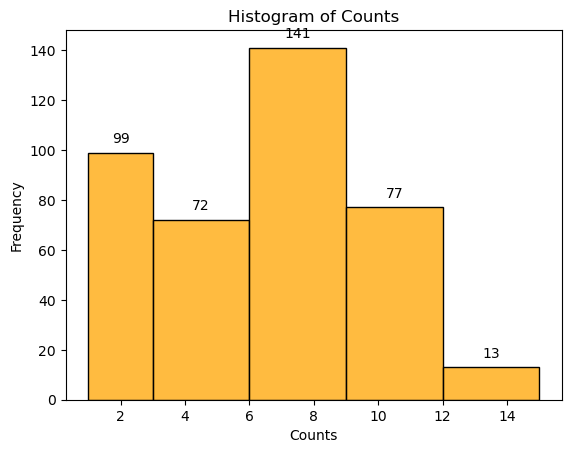

In [646]:
# Create a histogram using Seaborn
sns.histplot(data=df_repeat, x='counts',  bins=[1, 3, 6,9,12, 15], color = 'orange')  # Adjust the number of bins as needed

# Set the title and labels
plt.title('Histogram of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')

# Display frequency number above each bar
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### INSIGHT :

##### There are 99 vehicles which went for maintenace (1-3)  times from April to till Now 
##### There are 72 vehicles which went for maintenace (3-6) times from April to till Now
##### There are 141 vehicles which went for maintenace (6-9) times from April to till Now 
##### There are 77 vehicles which went for maintenace (9-12) times from April to till Now 
##### There are 13 vehicles which went for maintenace (12-15) times from April to till Now 

#### Manufacturing year wise analysis

In [647]:
df_year = df.groupby('manufacturing_year').agg(count_of_vehicles = ('vehicle_no','nunique'),maintenance_count = ('jc_no','count'),
                    total_cost = ('total','sum'),time_taken = ('time_taken_hours_days','sum')).reset_index()
df_year['time_taken_per_vehicle'] = round(df_year['time_taken']/df_year['count_of_vehicles'])
df_year['cost_per_vehicle'] = round(df_year['total_cost']/df_year['count_of_vehicles'])


#### sorted by total cost vehicle descending

In [648]:
df_year.sort_values(by = 'total_cost', ascending = False)

,manufacturing_year,count_of_vehicles,maintenance_count,total_cost,time_taken,time_taken_per_vehicle,cost_per_vehicle
8,2018.0,75,328,8936772.10,3889,52.0,119157.0
7,2017.0,71,455,6752809.21,4700,66.0,95110.0
3,2012.0,59,423,5415936.73,5585,95.0,91796.0
6,2016.0,47,295,5274730.54,3442,73.0,112228.0
5,2015.0,22,70,2898699.65,1408,64.0,131759.0
1,2010.0,13,81,1144315.58,1473,113.0,88024.0
9,2019.0,20,127,887408.22,1276,64.0,44370.0
12,2022.0,30,171,719935.23,1439,48.0,23998.0
13,2023.0,23,126,647649.27,1132,49.0,28159.0
11,2021.0,17,109,548080.80,749,44.0,32240.0


#### sorted by total cost per vehicle descending

In [649]:
df_year.sort_values(by = 'cost_per_vehicle', ascending = False)

,manufacturing_year,count_of_vehicles,maintenance_count,total_cost,time_taken,time_taken_per_vehicle,cost_per_vehicle
0,0.0,3,5,526324.52,162,54.0,175442.0
5,2015.0,22,70,2898699.65,1408,64.0,131759.0
8,2018.0,75,328,8936772.10,3889,52.0,119157.0
6,2016.0,47,295,5274730.54,3442,73.0,112228.0
7,2017.0,71,455,6752809.21,4700,66.0,95110.0
3,2012.0,59,423,5415936.73,5585,95.0,91796.0
1,2010.0,13,81,1144315.58,1473,113.0,88024.0
4,2013.0,3,16,219545.83,193,64.0,73182.0
2,2011.0,9,53,472795.36,1176,131.0,52533.0
10,2020.0,10,87,483288.18,593,59.0,48329.0


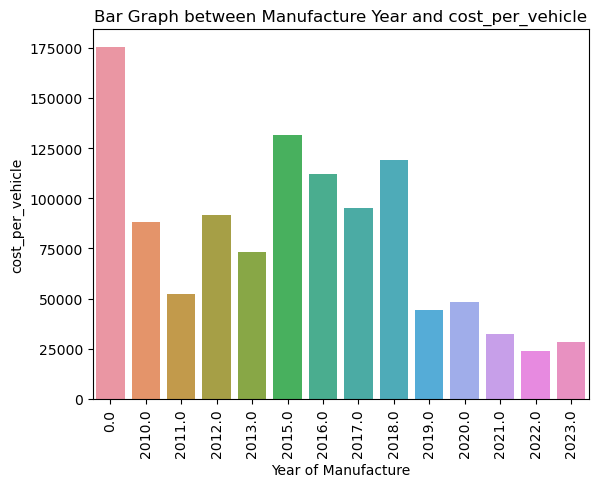

In [650]:
# Create a bar graph
sns.barplot(x='manufacturing_year', y='cost_per_vehicle', data=df_year)

# Title, x-label, y-label
plt.title('Bar Graph between Manufacture Year and cost_per_vehicle')
plt.xlabel('Year of Manufacture')
plt.ylabel('cost_per_vehicle')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the bar graph
plt.show()

#### INSIGHT:  per vehicle maintenance cost for vehicles manufactured year (2015- 2018) is significantly high

#### sorted by time taken per vehicle descending

In [651]:
df_year.sort_values(by = 'time_taken_per_vehicle', ascending = False)

,manufacturing_year,count_of_vehicles,maintenance_count,total_cost,time_taken,time_taken_per_vehicle,cost_per_vehicle
2,2011.0,9,53,472795.36,1176,131.0,52533.0
1,2010.0,13,81,1144315.58,1473,113.0,88024.0
3,2012.0,59,423,5415936.73,5585,95.0,91796.0
6,2016.0,47,295,5274730.54,3442,73.0,112228.0
7,2017.0,71,455,6752809.21,4700,66.0,95110.0
4,2013.0,3,16,219545.83,193,64.0,73182.0
5,2015.0,22,70,2898699.65,1408,64.0,131759.0
9,2019.0,20,127,887408.22,1276,64.0,44370.0
10,2020.0,10,87,483288.18,593,59.0,48329.0
0,0.0,3,5,526324.52,162,54.0,175442.0


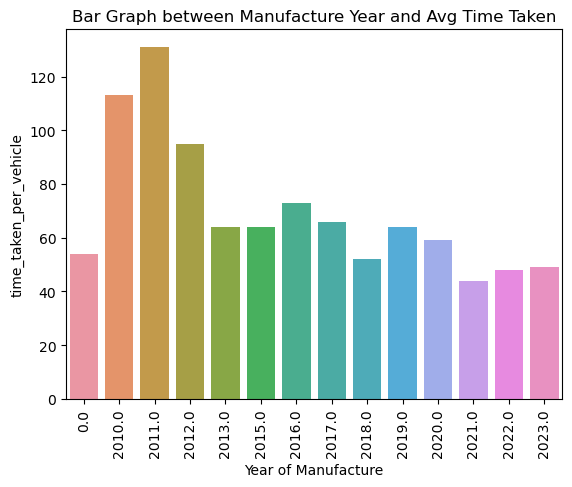

In [652]:
# Create a bar graph
sns.barplot(x='manufacturing_year', y='time_taken_per_vehicle', data=df_year)

# Title, x-label, y-label
plt.title('Bar Graph between Manufacture Year and Avg Time Taken')
plt.xlabel('Year of Manufacture')
plt.ylabel('time_taken_per_vehicle')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the bar graph
plt.show()

#### INSIGHT : Vehicales manufacture year (2010-2012) were under maintenance for longer periods

In [653]:
df_year1 = df_year[df_year.manufacturing_year != 0]

#### Correlation between manufacturing_year & time_taken_per_vehicle

##### High Negative correlation 

In [654]:
df_year1['manufacturing_year'].corr(df_year1['time_taken_per_vehicle'])

-0.8524631552939369

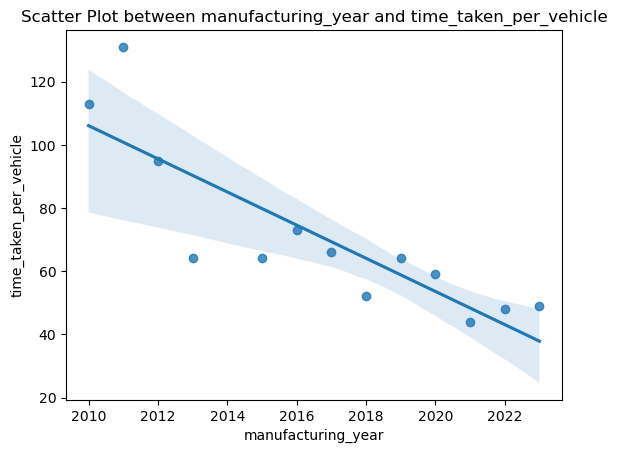

In [655]:
# Plot a scatter plot with a regression line (trend line)
sns.regplot(x='manufacturing_year', y='time_taken_per_vehicle', data=df_year1)

# Set the title and labels
plt.title('Scatter Plot between manufacturing_year and time_taken_per_vehicle')
plt.xlabel('manufacturing_year')
plt.ylabel('time_taken_per_vehicle')

# Show the plot
plt.show()

#### Correlation between manufacturing_year & cost_per_vehicle


In [656]:
df_year1['manufacturing_year'].corr(df_year1['cost_per_vehicle'])

-0.5295503783229555

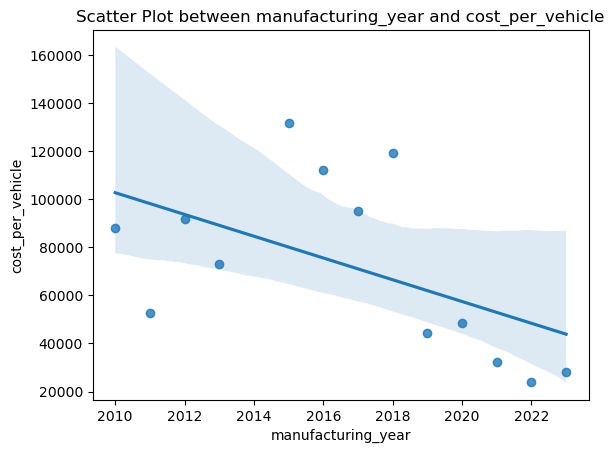

In [657]:
# Plot a scatter plot with a regression line (trend line)
sns.regplot(x='manufacturing_year', y='cost_per_vehicle', data=df_year1)

# Set the title and labels
plt.title('Scatter Plot between manufacturing_year and cost_per_vehicle')
plt.xlabel('manufacturing_year')
plt.ylabel('cost_per_vehicle')

# Show the plot
plt.show()

#### INSIGHT : Moderate Negative Linear Relation 
##### This means year or manufacture have moderate relation with cost per vehicle

#### Brand Wise Analysis

In [658]:
df_brand = df.groupby(['brand']).agg(count_of_vehicles = ('vehicle_no','nunique'),maintenance_count = ('jc_no','count'),
                    total_cost = ('total','sum'),time_taken = ('time_taken_hours_days','sum')).reset_index()
df_brand['time_taken_per_vehicle'] = round(df_brand['time_taken']/df_brand['count_of_vehicles'])
df_brand['cost_per_vehicle'] = round(df_brand['total_cost']/df_brand['count_of_vehicles'])

In [659]:
df_brand

,brand,count_of_vehicles,maintenance_count,total_cost,time_taken,time_taken_per_vehicle,cost_per_vehicle
0,Ashok Leyand Ltd,27,195,2216502.34,1834,68.0,82093.0
1,Eicher,10,79,270125.12,469,47.0,27013.0
2,Mahindra,31,260,1690508.74,1914,62.0,54533.0
3,TATA Motors Ltd,334,1812,30751155.02,23000,69.0,92069.0


#### Plot between Vehicle Brand & Cost Per Vehicle

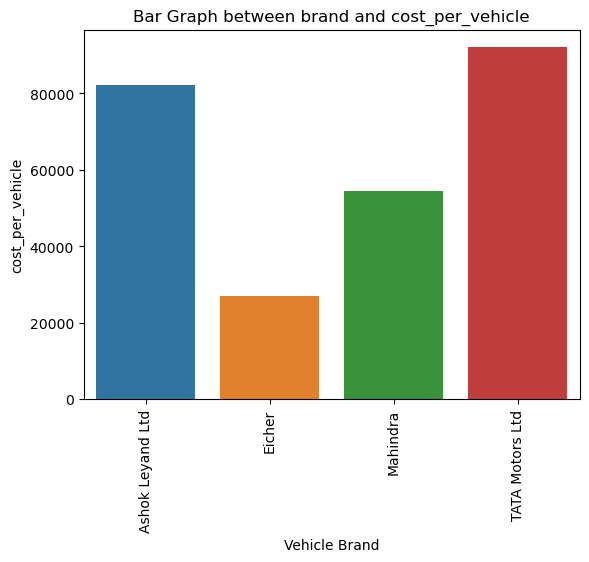

In [660]:
# Create a bar graph
sns.barplot(x='brand', y='cost_per_vehicle', data=df_brand)

# Title, x-label, y-label
plt.title('Bar Graph between brand and cost_per_vehicle')
plt.xlabel('Vehicle Brand')
plt.ylabel('cost_per_vehicle')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the bar graph
plt.show()

In [661]:
#### Plot between Vehicle Brand & time_taken_per_vehicle

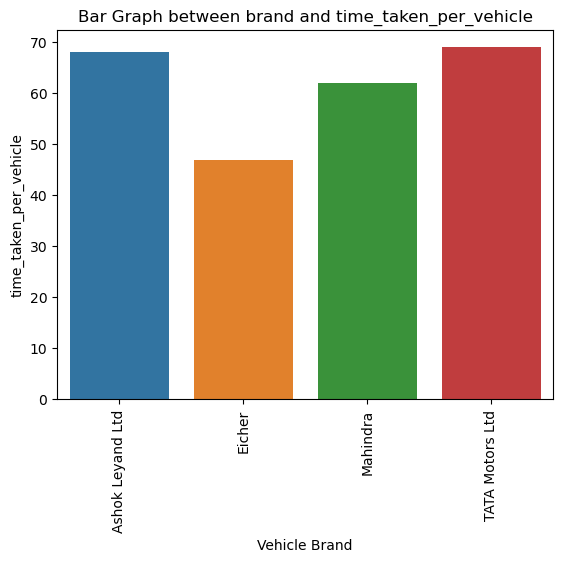

In [662]:
# Create a bar graph
sns.barplot(x='brand', y='time_taken_per_vehicle', data=df_brand)

# Title, x-label, y-label
plt.title('Bar Graph between brand and time_taken_per_vehicle')
plt.xlabel('Vehicle Brand')
plt.ylabel('time_taken_per_vehicle')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the bar graph
plt.show()

#### INSIGHTS :
#### 1* Time taken per vehicle is almost constant for TATA, Mahindra, Ashok Leyland except Eicher is performing well here
#### 2* Per vehicle cost for Eicher & Mahindra is significantly low 


#### Brand & Body Type Wise Analysis

In [663]:
df_brand_body = df.groupby(['brand','body_type']).agg(count_of_vehicles = ('vehicle_no','nunique'),maintenance_count = ('jc_no','count'),
                    total_cost = ('total','sum'),time_taken = ('time_taken_hours_days','sum')).reset_index()
df_brand_body['time_taken_per_vehicle'] = round(df_brand_body['time_taken']/df_brand_body['count_of_vehicles'])
df_brand_body['cost_per_vehicle'] = round(df_brand_body['total_cost']/df_brand_body['count_of_vehicles'])

##### Sorted by body_type & total cost desceneding

In [664]:
df_brand_body.sort_values(by = ['body_type','total_cost'], ascending  = False)

,brand,body_type,count_of_vehicles,maintenance_count,total_cost,time_taken,time_taken_per_vehicle,cost_per_vehicle
6,TATA Motors Ltd,TR08,332,1810,30556705.91,22932,69.0,92038.0
4,Mahindra,TR08,31,260,1690508.74,1914,62.0,54533.0
1,Ashok Leyand Ltd,TR08,7,68,481477.05,673,96.0,68782.0
3,Eicher,TR08,5,33,126348.19,209,42.0,25270.0
0,Ashok Leyand Ltd,TOT,20,127,1735025.29,1161,58.0,86751.0
5,TATA Motors Ltd,TOT,2,2,194449.11,68,34.0,97225.0
2,Eicher,TK04,5,46,143776.93,260,52.0,28755.0


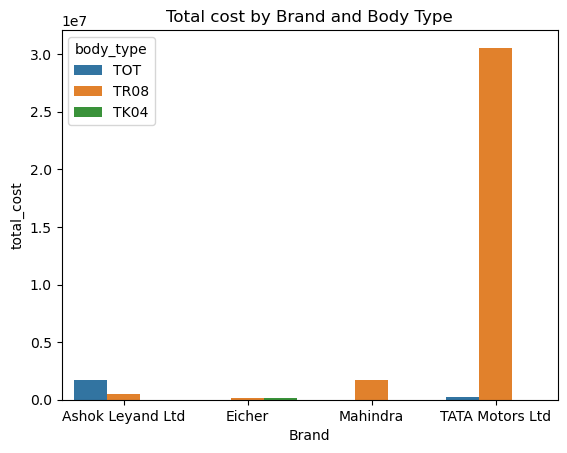

In [665]:
# Create a clustered bar plot
sns.barplot(x='brand', y='total_cost', hue='body_type', data=df_brand_body, errorbar=None)

# Set the title and labels
plt.title('Total cost by Brand and Body Type')
plt.xlabel('Brand')
plt.ylabel('total_cost')

# Show the plot
plt.show()

#### clustered bar plot between Brand , Body type and Cost Per Vehicle

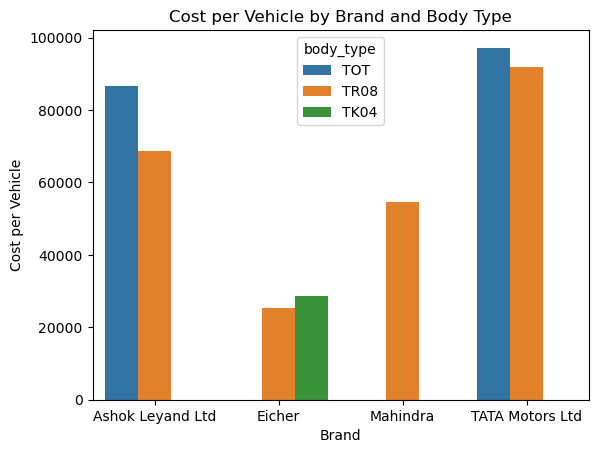

In [666]:
# Create a clustered bar plot
sns.barplot(x='brand', y='cost_per_vehicle', hue='body_type', data=df_brand_body, errorbar=None)

# Set the title and labels
plt.title('Cost per Vehicle by Brand and Body Type')
plt.xlabel('Brand')
plt.ylabel('Cost per Vehicle')

# Show the plot
plt.show()

#### clustered bar plot between Brand , Body type and Time taken Per Vehicle

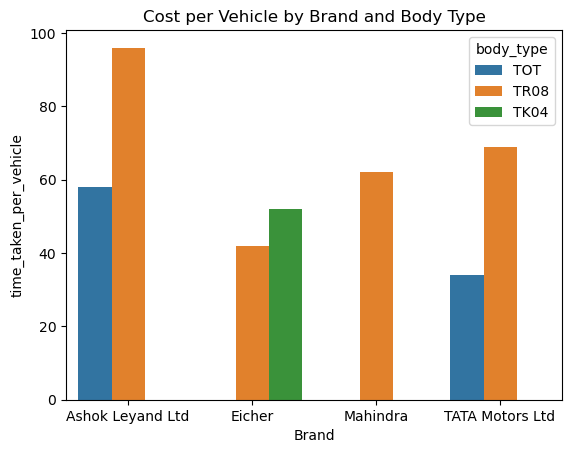

In [667]:
# Create a clustered bar plot
sns.barplot(x='brand', y='time_taken_per_vehicle', hue='body_type', data=df_brand_body, errorbar=None)

# Set the title and labels
plt.title('Cost per Vehicle by Brand and Body Type')
plt.xlabel('Brand')
plt.ylabel('time_taken_per_vehicle')

# Show the plot
plt.show()

#### INSIGHT : Ashoka Leyland TR08 taking significantly higher time it can be because of various reasons like : Spare part Inavailibility, Employees taking more time understanding issues, or some modification work

### Pareto Analysis

In [668]:
# Threshold for cumulative percentage
# Change this threshold to your desired percentage
threshold = 50

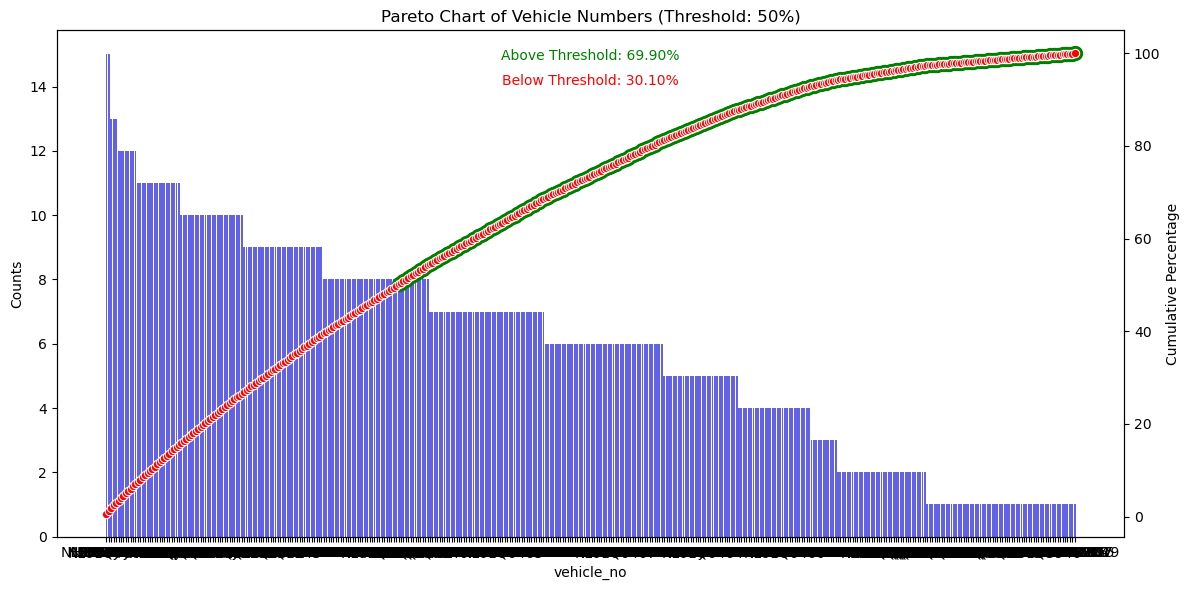

In [669]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_repeat' is your DataFrame with 'vehicle_no' (categorical) and 'counts' columns

# Sort the DataFrame by counts in descending order
df_repeat = df_repeat.sort_values(by='counts', ascending=False)

# Calculate cumulative percentage
df_repeat['cumulative_percentage'] = df_repeat['counts'].cumsum() / df_repeat['counts'].sum() * 100


# Calculate percentage of total vehicles above and below threshold
total_vehicles = len(df_repeat)
vehicles_above_threshold = len(df_repeat[df_repeat['cumulative_percentage'] >= threshold])
vehicles_below_threshold = total_vehicles - vehicles_above_threshold
percent_above_threshold = (vehicles_above_threshold / total_vehicles) * 100
percent_below_threshold = (vehicles_below_threshold / total_vehicles) * 100

# Plotting the Pareto chart with Seaborn
plt.figure(figsize=(12, 6))

# Bar plot for counts using Seaborn
sns.barplot(x='vehicle_no', y='counts', data=df_repeat, color='blue', alpha=0.7)
plt.ylabel('Counts')

# Line plot for cumulative percentage
plt.twinx()
sns.lineplot(x='vehicle_no', y='cumulative_percentage', data=df_repeat, color='red', marker='o')
plt.ylabel('Cumulative Percentage')

# Highlight points where cumulative percentage reaches the threshold
threshold_points = df_repeat[df_repeat['cumulative_percentage'] >= threshold]
plt.scatter(threshold_points['vehicle_no'], threshold_points['cumulative_percentage'], color='green', marker='o', s=100)

# Rotate x-axis labels vertically and increase spacing
plt.xticks(rotation='vertical', fontsize='small')

# Show percentage of total vehicles above and below threshold
plt.text(0.5, 0.95, f'Above Threshold: {percent_above_threshold:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='green')
plt.text(0.5, 0.9, f'Below Threshold: {percent_below_threshold:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='red')

# Show or save the plot
plt.title(f'Pareto Chart of Vehicle Numbers (Threshold: {threshold}%)')
plt.grid(False)
plt.tight_layout()
plt.show()


### Bad Performimng Vehicles
#### Here 30 percent vehicles are responsible for 50 percent of job cards

In [670]:
# Assuming 'df_repeat' is your DataFrame with 'vehicle_no' (categorical) and 'counts' columns

# Sort the DataFrame by counts in descending order
df_repeat = df_repeat.sort_values(by='counts', ascending=False)

# Calculate cumulative percentage
df_repeat['cumulative_percentage'] = df_repeat['counts'].cumsum() / df_repeat['counts'].sum() * 100


# Filter vehicle numbers below the threshold
df_repeat[df_repeat['cumulative_percentage'] < threshold]



,vehicle_no,brand,model,manufacturing_year,counts,total_cost,avg_cost,min_cost,max_cost,time_taken,avg_time,max_time,cumulative_percentage
0,NL01AG3425,TATA Motors Ltd,3518-Tata,2012.0,15,124711.85,8314.123333,0.00,42089.37,120,8.000000,24,0.639386
1,NL01Q7647,Ashok Leyand Ltd,3518-AL,2017.0,15,79504.45,5300.296667,260.00,22426.44,94,6.266667,21,1.278772
2,HR55AJ3502,Mahindra,Mahindra 4018,2020.0,13,64765.75,4981.980769,0.00,14896.19,79,6.076923,19,1.832907
3,HR55AE6377,TATA Motors Ltd,Signa-3518S,2018.0,13,69520.51,5347.731538,0.00,16615.29,77,5.923077,26,2.387042
4,NL01AA8907,Mahindra,Mahindra 4018,2017.0,13,74204.57,5708.043846,79.82,21896.42,59,4.538462,11,2.941176
8,PB11CF5228,TATA Motors Ltd,3518-Tata,2017.0,12,140679.54,11723.295000,50.00,58966.13,106,8.833333,24,3.452685
5,NL01AF8446,TATA Motors Ltd,4018 Tata Signa S,2022.0,12,30319.15,2526.595833,0.00,7587.45,135,11.250000,47,3.964194
7,PB11CF5226,TATA Motors Ltd,3518-Tata,2017.0,12,83252.64,6937.720000,0.00,27516.65,130,10.833333,31,4.475703
6,PB11CB7807,TATA Motors Ltd,3518-Tata,2017.0,12,125321.08,10443.423333,132.41,47213.72,104,8.666667,32,4.987212
11,PB11CF5231,TATA Motors Ltd,3518-Tata,2017.0,12,76670.80,6389.233333,0.00,38691.60,127,10.583333,30,5.498721


In [671]:
df_thirty_percent = df_repeat[df_repeat['cumulative_percentage'] < threshold]

In [672]:
df_thirty_analysis = df_thirty_percent.groupby(['brand','model']).agg(vehicle_count = ('vehicle_no','nunique'),
                    maintenance_count = ('counts','sum'),cost_amount = ('total_cost','sum'),
                    total_time_taken = ('time_taken','sum')).reset_index()

In [673]:
df_thirty_analysis

,brand,model,vehicle_count,maintenance_count,cost_amount,total_time_taken
0,Ashok Leyand Ltd,3518-AL,10,95,807901.86,783
1,Eicher,5016-Eicher Pro,4,40,128523.44,221
2,Eicher,Pro 6040 TT,1,9,26085.65,69
3,Mahindra,Mahindra 4018,15,152,951133.56,961
4,TATA Motors Ltd,3518-Tata,64,622,6623378.55,6618
5,TATA Motors Ltd,4018 Tata Signa S,8,71,323438.52,507
6,TATA Motors Ltd,4021-Tata Signa (4S),6,53,170772.79,404
7,TATA Motors Ltd,Signa-3518S,13,126,979569.60,970


In [674]:
df_thirty_analysis['avg_no_time_under_maintenace'] = round(df_thirty_analysis['maintenance_count']/df_thirty_analysis['vehicle_count'])
df_thirty_analysis['avg_time_per_visit'] = round(df_thirty_analysis['total_time_taken']/df_thirty_analysis['maintenance_count'])
df_thirty_analysis['cost_per_vehicle'] = round(df_thirty_analysis['cost_amount']/df_thirty_analysis['vehicle_count'])



#### Sorted by Cost Per Vehicle

In [675]:
df_thirty_analysis.sort_values(by = 'cost_per_vehicle', ascending = False)

,brand,model,vehicle_count,maintenance_count,cost_amount,total_time_taken,avg_no_time_under_maintenace,avg_time_per_visit,cost_per_vehicle
4,TATA Motors Ltd,3518-Tata,64,622,6623378.55,6618,10.0,11.0,103490.0
0,Ashok Leyand Ltd,3518-AL,10,95,807901.86,783,10.0,8.0,80790.0
7,TATA Motors Ltd,Signa-3518S,13,126,979569.60,970,10.0,8.0,75352.0
3,Mahindra,Mahindra 4018,15,152,951133.56,961,10.0,6.0,63409.0
5,TATA Motors Ltd,4018 Tata Signa S,8,71,323438.52,507,9.0,7.0,40430.0
1,Eicher,5016-Eicher Pro,4,40,128523.44,221,10.0,6.0,32131.0
6,TATA Motors Ltd,4021-Tata Signa (4S),6,53,170772.79,404,9.0,8.0,28462.0
2,Eicher,Pro 6040 TT,1,9,26085.65,69,9.0,8.0,26086.0


#### Sorted by cost amount

In [677]:
df_thirty_analysis.sort_values(by = 'cost_amount', ascending = False)

,brand,model,vehicle_count,maintenance_count,cost_amount,total_time_taken,avg_no_time_under_maintenace,avg_time_per_visit,cost_per_vehicle
4,TATA Motors Ltd,3518-Tata,64,622,6623378.55,6618,10.0,11.0,103490.0
7,TATA Motors Ltd,Signa-3518S,13,126,979569.60,970,10.0,8.0,75352.0
3,Mahindra,Mahindra 4018,15,152,951133.56,961,10.0,6.0,63409.0
0,Ashok Leyand Ltd,3518-AL,10,95,807901.86,783,10.0,8.0,80790.0
5,TATA Motors Ltd,4018 Tata Signa S,8,71,323438.52,507,9.0,7.0,40430.0
6,TATA Motors Ltd,4021-Tata Signa (4S),6,53,170772.79,404,9.0,8.0,28462.0
1,Eicher,5016-Eicher Pro,4,40,128523.44,221,10.0,6.0,32131.0
2,Eicher,Pro 6040 TT,1,9,26085.65,69,9.0,8.0,26086.0


### If Required :

#### we can check correlation between odometer vs cost of maintenace and frequency of maintenane 
#### We can check remarks for what kind of issues are occuring more often.